In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/diabetes_DT.csv


In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

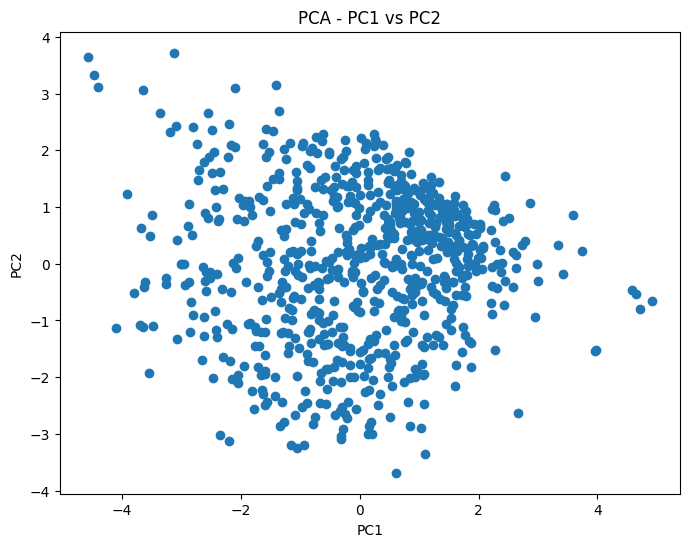

Variable importance for PC1 and PC2:
                               PC1       PC2
Pregnancies              -0.215998 -0.527446
Glucose                  -0.436757 -0.095635
BloodPressure            -0.300455 -0.046253
SkinThickness            -0.307292  0.448398
Insulin                  -0.336332  0.355346
BMI                      -0.397342  0.210316
DiabetesPedigreeFunction -0.237634  0.175195
Age                      -0.278656 -0.533202
Outcome                  -0.415653 -0.154768
Variance explained by PC1 and PC2: [0.26138907 0.19714578]
Cumulative variance explained: [0.26138907 0.45853485 0.58300431 0.68099929 0.77484634 0.85649836
 0.91076763 0.9572322  1.        ]
Number of PCs explaining >80% variance: 6


In [3]:

# 1. PCA Implementation
data = pd.read_csv("/kaggle/input/diabetes/diabetes_DT.csv")  # Replace with your dataset
X = data.select_dtypes(include=[np.number])  # Use only numeric features

# (a) Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Standardization is necessary to ensure all variables contribute equally to PCA.

# PCA transformation
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# (b) Scatter plot with PC1 and PC2
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - PC1 vs PC2')
plt.show()

# (c) Most important variables for PC1 and PC2
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(X.shape[1])], index=X.columns)
print("Variable importance for PC1 and PC2:")
print(loadings[['PC1','PC2']])

# (d) Variance explained by PC1 and PC2
explained_variance = pca.explained_variance_ratio_
print("Variance explained by PC1 and PC2:", explained_variance[:2])
print("Cumulative variance explained:", np.cumsum(explained_variance))

# (e) Number of PCs to explain >80% variance
num_pc_80 = np.argmax(np.cumsum(explained_variance) >= 0.8) + 1
print("Number of PCs explaining >80% variance:", num_pc_80)

In [7]:
# 2. Linear Regression - House Price Prediction
house_data = pd.read_csv("/kaggle/input/train1/train.csv")  
X = house_data[['GrLivArea']] 
y = house_data['SalePrice']

lr = LinearRegression()
lr.fit(X, y)

print("Intercept:", lr.intercept_)
print("Slope:", lr.coef_[0])

y_pred = lr.predict(X)
print("MSE:", mean_squared_error(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", mean_squared_error(y, y_pred, squared=False))

Intercept: 18569.02585648722
Slope: 107.1303589658252
MSE: 3139843209.6665273
MAE: 37638.72898759625
RMSE: 56034.303865279944


In [5]:
# Salary_Data.csv
salary_data = pd.read_csv("/kaggle/input/salarydata/Salary_Data (2).csv")
X = salary_data[['YearsExperience']]
y = salary_data['Salary']

lr_salary = LinearRegression()
lr_salary.fit(X, y)
print("Salary Model Intercept:", lr_salary.intercept_)
print("Salary Model Slope:", lr_salary.coef_[0])
y_pred_salary = lr_salary.predict(X)
print("Salary MSE:", mean_squared_error(y, y_pred_salary))
print("Salary MAE:", mean_absolute_error(y, y_pred_salary))
print("Salary RMSE:", mean_squared_error(y, y_pred_salary, squared=False))

Salary Model Intercept: 25792.200198668696
Salary Model Slope: 9449.962321455076
Salary MSE: 31270951.722280964
Salary MAE: 4644.2012894435375
Salary RMSE: 5592.043608760661


In [8]:
# House Price Multiple Linear Regression
X = house_data[['GrLivArea','TotalBsmtSF','OverallQual']]  # Example multiple features
y = house_data['SalePrice']
multi_lr_house = LinearRegression()
multi_lr_house.fit(X, y)
print("Intercept:", multi_lr_house.intercept_)
print("Coefficients:", multi_lr_house.coef_)

Intercept: -103806.02063438072
Coefficients: [   49.45262987    36.61501735 28046.71532769]


In [ ]:
# 4. Polynomial Linear Regression - Non-linear dataset
poly_data = pd.read_csv("nonlinear_data.csv")  # Replace with dataset
X = poly_data[['X']]
y = poly_data['Y']
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_lr = LinearRegression()
poly_lr.fit(X_poly, y)

plt.scatter(X, y)
plt.plot(X, poly_lr.predict(X_poly), color='red')
plt.show()

In [13]:
# 5. Logistic Regression - Diabetes Dataset
diabetes_data = pd.read_csv("/kaggle/input/diabetes/diabetes_DT.csv")
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

In [11]:
# 6. Evaluation
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
 [[78 21]
 [18 37]]
Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682


In [12]:
# Manual calculation from confusion matrix
TN, FP, FN, TP = cm.ravel()
manual_accuracy = (TP + TN) / (TP + TN + FP + FN)
manual_precision = TP / (TP + FP)
manual_recall = TP / (TP + FN)
manual_f1 = 2 * (manual_precision * manual_recall) / (manual_precision + manual_recall)
print("Manual Accuracy:", manual_accuracy)
print("Manual Precision:", manual_precision)
print("Manual Recall:", manual_recall)
print("Manual F1 Score:", manual_f1)

Manual Accuracy: 0.7467532467532467
Manual Precision: 0.6379310344827587
Manual Recall: 0.6727272727272727
Manual F1 Score: 0.6548672566371682
